In [1]:
cd ..

/Users/Conor.Mccabe/src/PolicePrediction


In [2]:
import pandas as pd
from matplotlib import pyplot as plt

from policeprediction.preprocessing import preprocess_df, preprocess_key, add_values_from_key
from policeprediction.plotting import plot_attendance_rate_by_feature

plt.style.use('seaborn')
plt.rcParams["font.family"] = 'Futura'

In [3]:
key = pd.read_csv('data/roadsafetykey.csv')
df = pd.read_csv('data/dft-road-casualty-statistics-accident-2020.csv')

/Users/Conor.Mccabe/.pyenv/versions/3.7.11/envs/police/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3553: DtypeWarning: Columns (0,2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df = preprocess_df(df)
key = preprocess_key(key)

/Users/Conor.Mccabe/.pyenv/versions/3.7.11/envs/police/lib/python3.7/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [5]:
values_df = add_values_from_key(df, key)

In [6]:
df.columns

Index(['accident_index', 'accident_year', 'accident_reference',
       'location_easting_osgr', 'location_northing_osgr', 'longitude',
       'latitude', 'police_force', 'accident_severity', 'number_of_vehicles',
       'number_of_casualties', 'date', 'day_of_week', 'time',
       'local_authority_district', 'local_authority_ons_district',
       'local_authority_highway', 'first_road_class', 'first_road_number',
       'road_type', 'speed_limit', 'junction_detail', 'junction_control',
       'second_road_class', 'second_road_number',
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag', 'lsoa_of_accident_location', 'label', 'date_time',
       'hour_of_day', 'month_of_year'],
      dtype='object')

In [7]:
df.head()

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,label,date_time,hour_of_day,month_of_year
0,2020010219808,2020,10219808,521389.0,175144.0,-0.254001,51.462262,1,3,1,...,0,0,1,3,2,E01004576,0,2020-04-02,9,4
1,2020010220496,2020,10220496,529337.0,176237.0,-0.139253,51.470327,1,3,1,...,0,0,1,1,2,E01003034,1,2020-04-27,13,4
2,2020010228005,2020,10228005,526432.0,182761.0,-0.178719,51.529614,1,3,1,...,0,0,1,1,2,E01004726,1,2020-01-01,1,1
3,2020010228006,2020,10228006,538676.0,184371.0,-0.001683,51.541210,1,2,1,...,0,0,1,1,2,E01003617,1,2020-01-01,1,1
4,2020010228011,2020,10228011,529324.0,181286.0,-0.137592,51.515704,1,3,1,...,0,0,1,1,2,E01004763,1,2020-01-01,2,1


In [17]:
df.shape

(91199, 40)

In [14]:
features = ['hour_of_day',
            'day_of_week',
            'month_of_year', 
            'urban_or_rural_area',
            'accident_severity',
           'police_force',
           'speed_limit',
           'number_of_vehicles',
           'number_of_casualties',
            'junction_control',
           'pedestrian_crossing_human_control',
           'pedestrian_crossing_physical_facilities',
            'light_conditions',
           'weather_conditions',
            'road_surface_conditions',
           'special_conditions_at_site',
            'carriageway_hazards',
           'road_type']

Plot the mean attendance rate for a few features that might be predictive

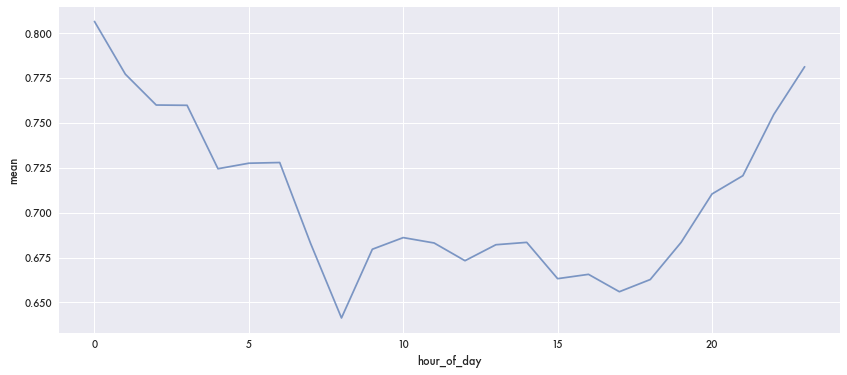

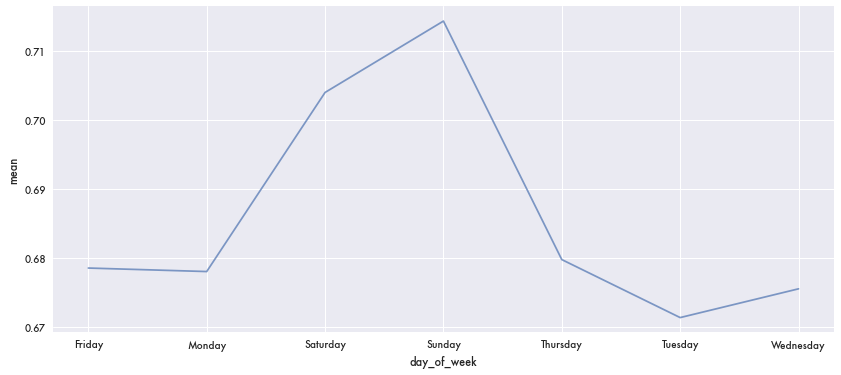

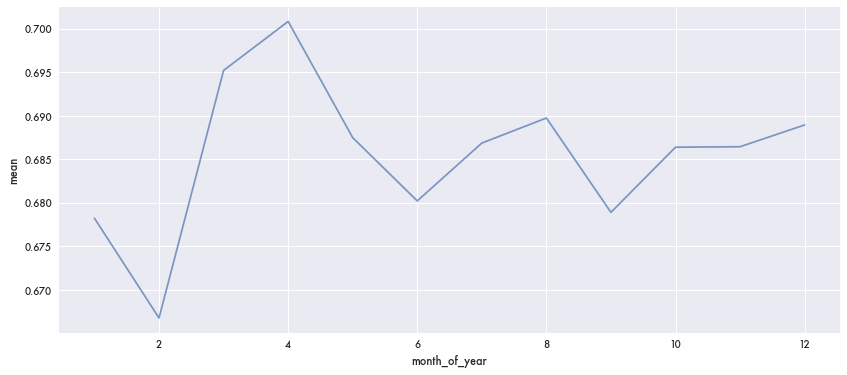

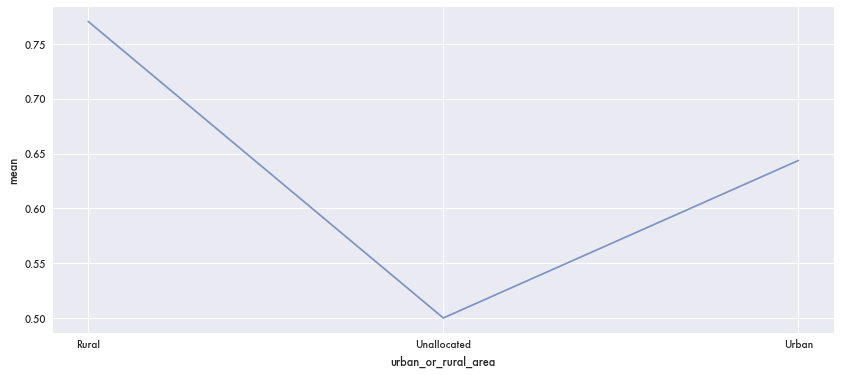

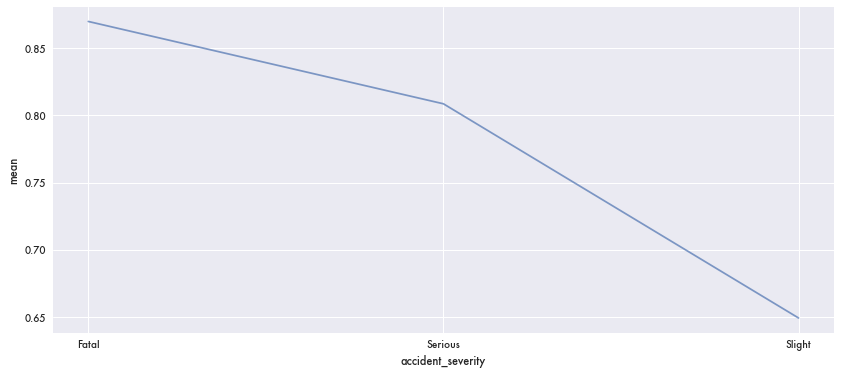

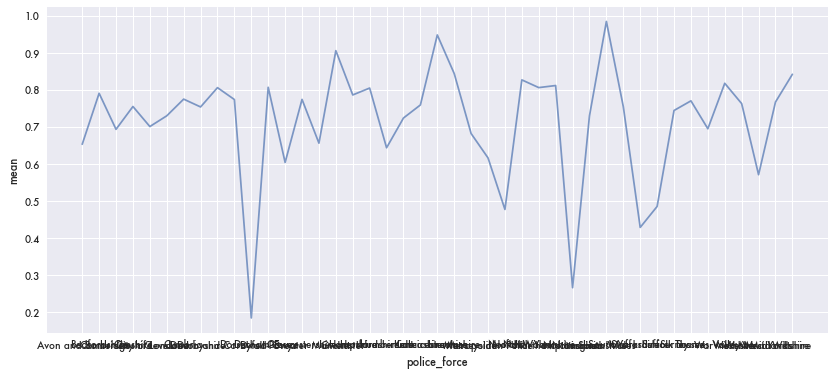

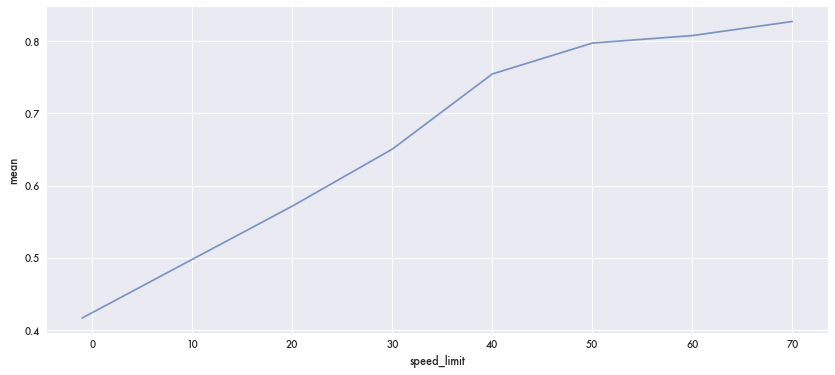

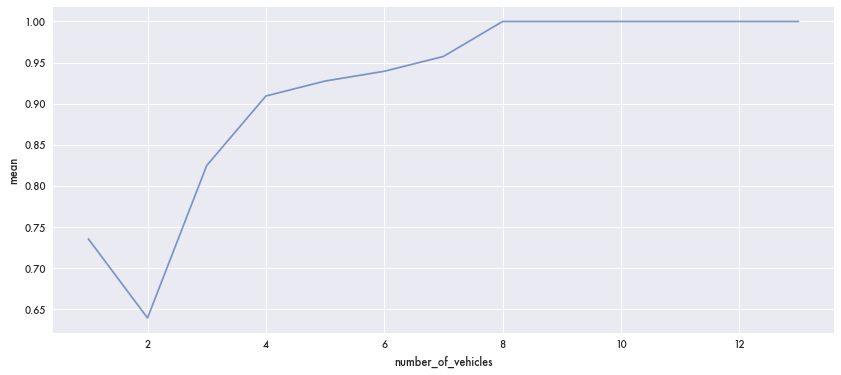

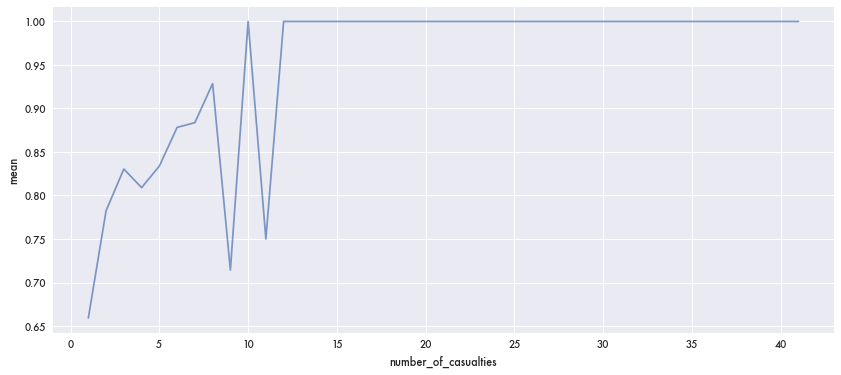

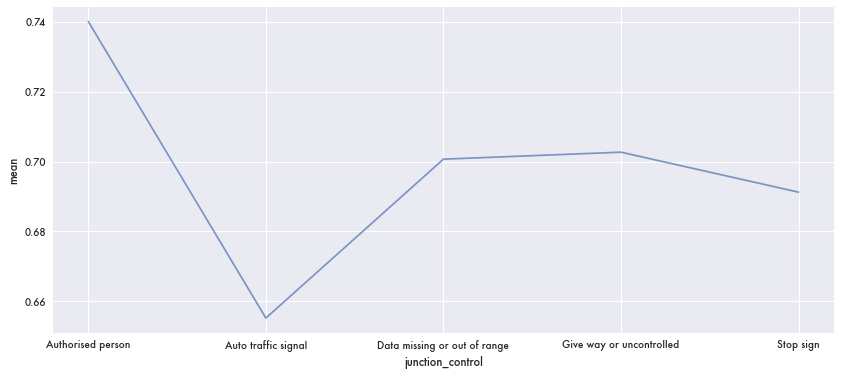

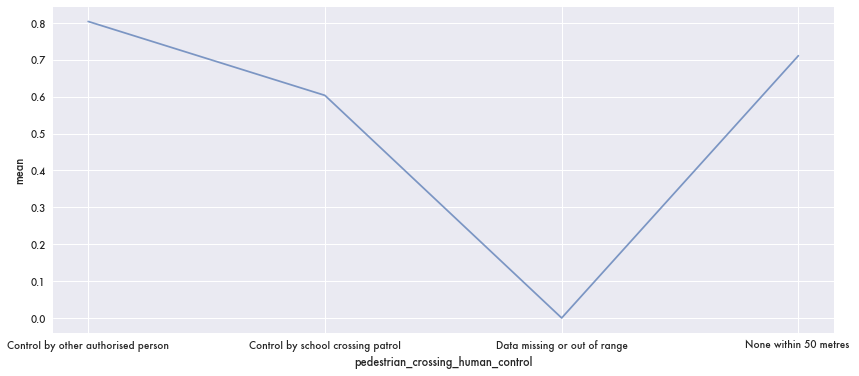

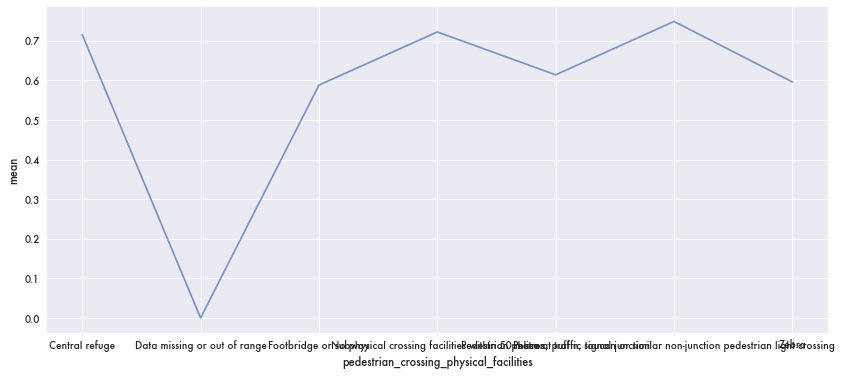

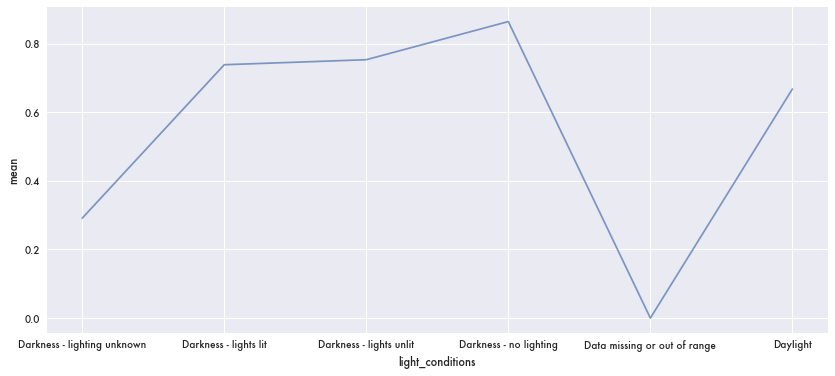

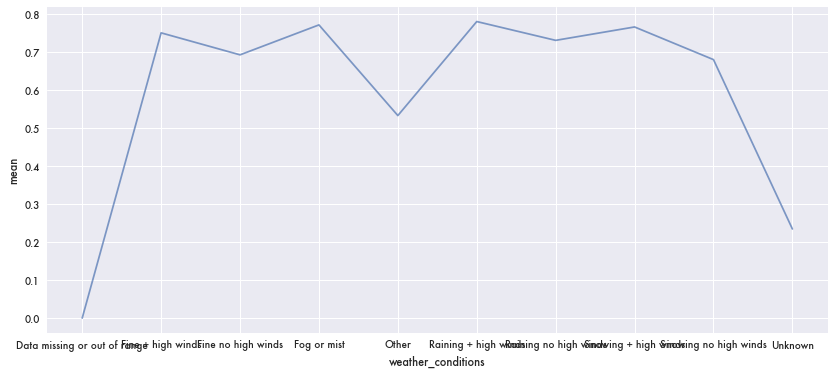

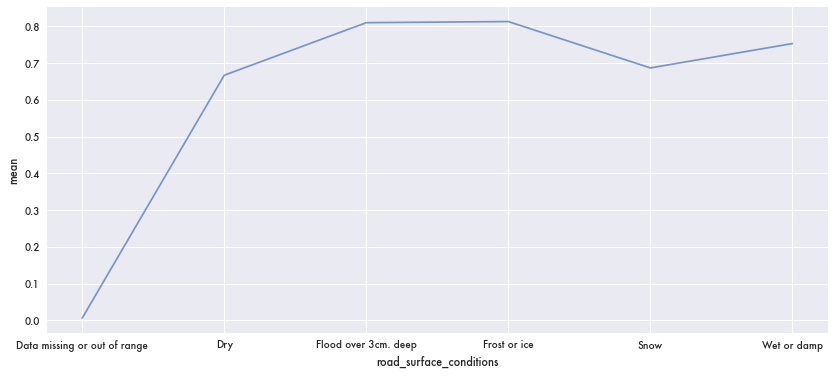

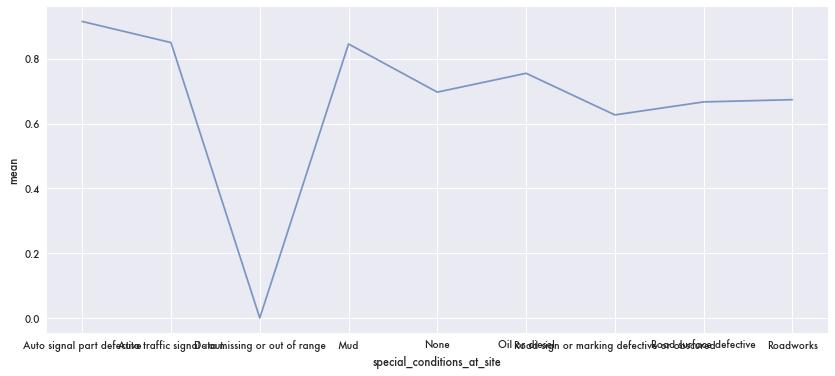

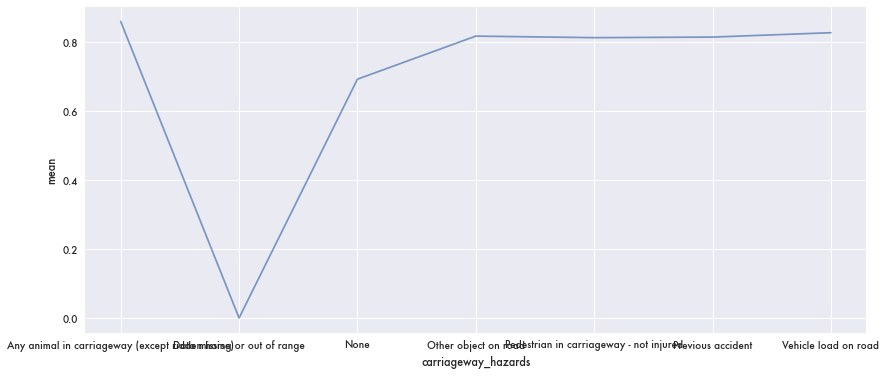

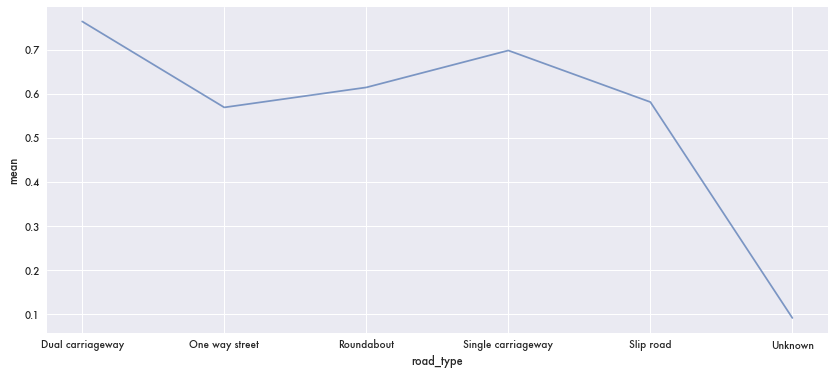

In [15]:
for feature in features:
    plot_attendance_rate_by_feature(values_df, feature)

Class imbalance?

In [16]:
df['label'].mean()

0.6846785600719306

There is a small imbalance in the distribution of the target but nothing we should be overly concerned about